In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tsmoothie.smoother import *
from tsmoothie.utils_func import create_windows

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *

from kerashypetune import KerasGridSearch

In [2]:
excel_file = 'Data.xlsx'
WOPR = pd.read_excel(excel_file, 1)
#NAMES = pd.read_excel(excel_file, 8)
total_field = pd.read_excel(excel_file, 10)
total_field


df = total_field
wopr=np.array(WOPR)
number=list()
for row in wopr:
    well=0
    for val in row:
        
        if val>0:
            well+=1
        else: well+=0
    numeber = number.append(well)
    number
number_of_prod_wells = pd.Series((n for n in number))
a=number_of_prod_wells.isnull().sum()
print('the number of nan is ',a)
#number_of_prod_wells
df['number'] = number_of_prod_wells
Time = df.Time
#df = df.set_index('Time')
#data  = df[1:]
df = df[['WWIR', 'WWPR', 'WWCT', 'WGOR', 'WGPR', 'WBHP', 'WGIR', 'number', 'WOPR']]

the number of nan is  0


In [3]:
df.head()

,WWIR,WWPR,WWCT,WGOR,WGPR,WBHP,WGIR,number,WOPR
0,0.0,0.000000,0.000000,0.00000,0.00,809.17371,0.00,0,0.0000
1,0.0,4.254708,0.000971,108.75953,476237.47,765.11941,0.00,2,4378.8115
2,0.0,4.225478,0.000964,108.71009,476107.63,762.55516,0.00,2,4379.6084
3,0.0,4.350357,0.000992,108.65411,475948.09,760.00822,0.00,2,4380.3970
4,0.0,5.632184,0.000989,108.56667,617919.31,744.72472,392180.97,2,5691.6118


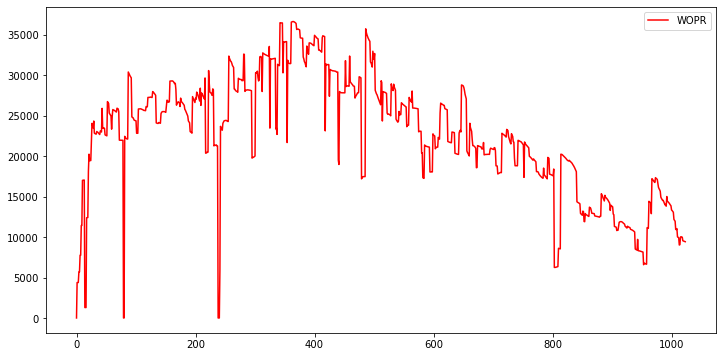

In [4]:
plt.figure(figsize=(12,6))

df.WOPR.plot(c='red')

plt.legend()

In [5]:
### USE KALMAN FILTER TO SMOOTH ALL DATA (ONLY VISUALIZATION PURPOSE) ###

smoother = KalmanSmoother(component='level_longseason', 
                          component_noise={'level':0.1, 'longseason':0.1}, 
                          n_longseasons=365)
smoother.smooth(df[['WWIR', 'WWPR', 'WWCT', 'WGOR', 'WGPR', 'WBHP', 'WGIR', 'number', 'WOPR']].T)

<tsmoothie.smoother.KalmanSmoother>

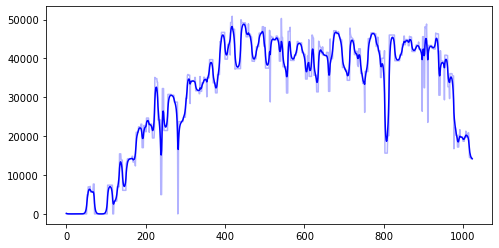

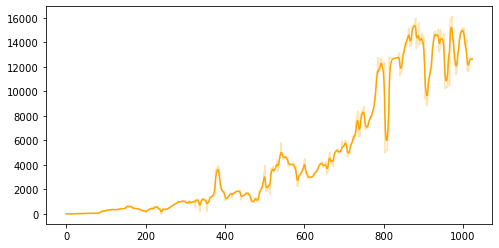

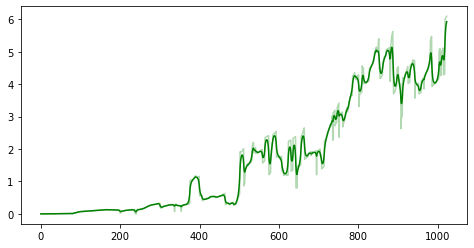

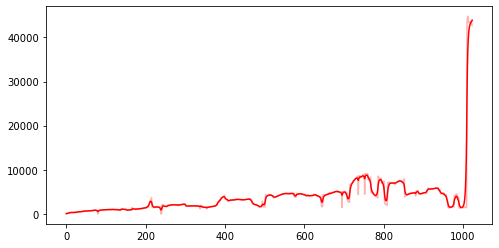

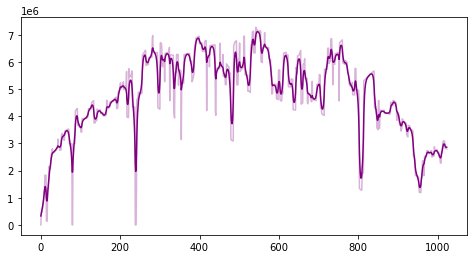

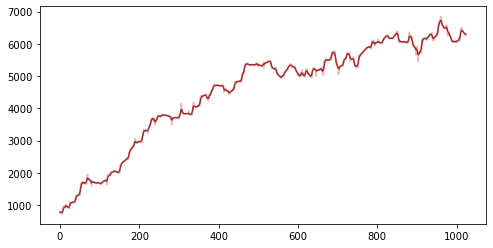

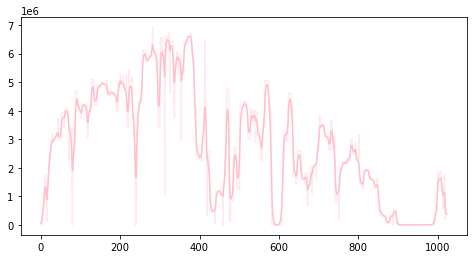

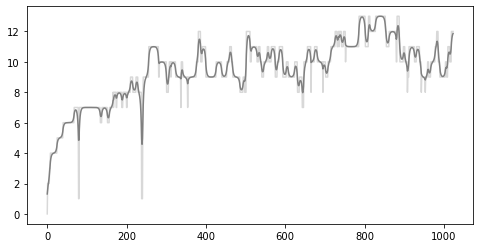

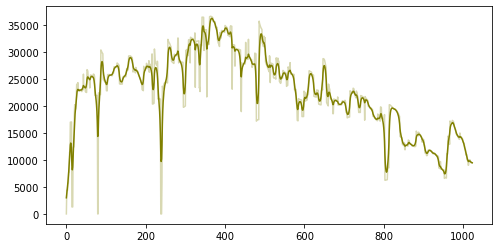

In [6]:
color = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

for i,name in enumerate(df.columns):
    
    plt.figure(figsize=(8,4))
    plt.plot(df.index, smoother.data[i], c=color[i], label=name, alpha=0.3)
    plt.plot(df.index, smoother.smooth_data[i], c=color[i], label=name+' smooth')

In [7]:
smoothed_df =pd.DataFrame(smoother.smooth_data).T
smoothed_df.columns = df.columns
smoothed_df

,WWIR,WWPR,WWCT,WGOR,WGPR,WBHP,WGIR,number,WOPR
0,131.084462,4.835622,0.000979,76.086576,3.297641e+05,778.682936,56959.764016,1.313130,2989.591340
1,83.108185,4.829750,0.001007,93.548533,4.123744e+05,774.313727,89359.376675,1.613458,3770.043554
2,52.298139,4.958100,0.001046,108.069064,4.826483e+05,771.883853,140211.952477,1.837088,4431.591128
3,32.509437,5.252319,0.001107,122.557026,5.546412e+05,771.423757,219672.939862,2.028655,5106.132221
4,19.796658,5.746343,0.001195,139.916098,6.427575e+05,773.353490,343606.367286,2.226398,5928.159454
...,...,...,...,...,...,...,...,...,...
1019,14891.738279,12602.817231,5.404877,43281.815124,2.906506e+06,6330.569940,723839.240760,11.268514,9663.453897
1020,14626.021862,12617.263444,5.634323,43408.444510,2.877575e+06,6317.327786,550031.032393,11.529288,9596.027476
1021,14442.353774,12630.760057,5.783247,43501.354882,2.861555e+06,6306.683810,444494.049345,11.696171,9545.472706
1022,14304.064029,12636.463747,5.876634,43641.292256,2.856333e+06,6298.675068,386170.576823,11.802468,9508.189921


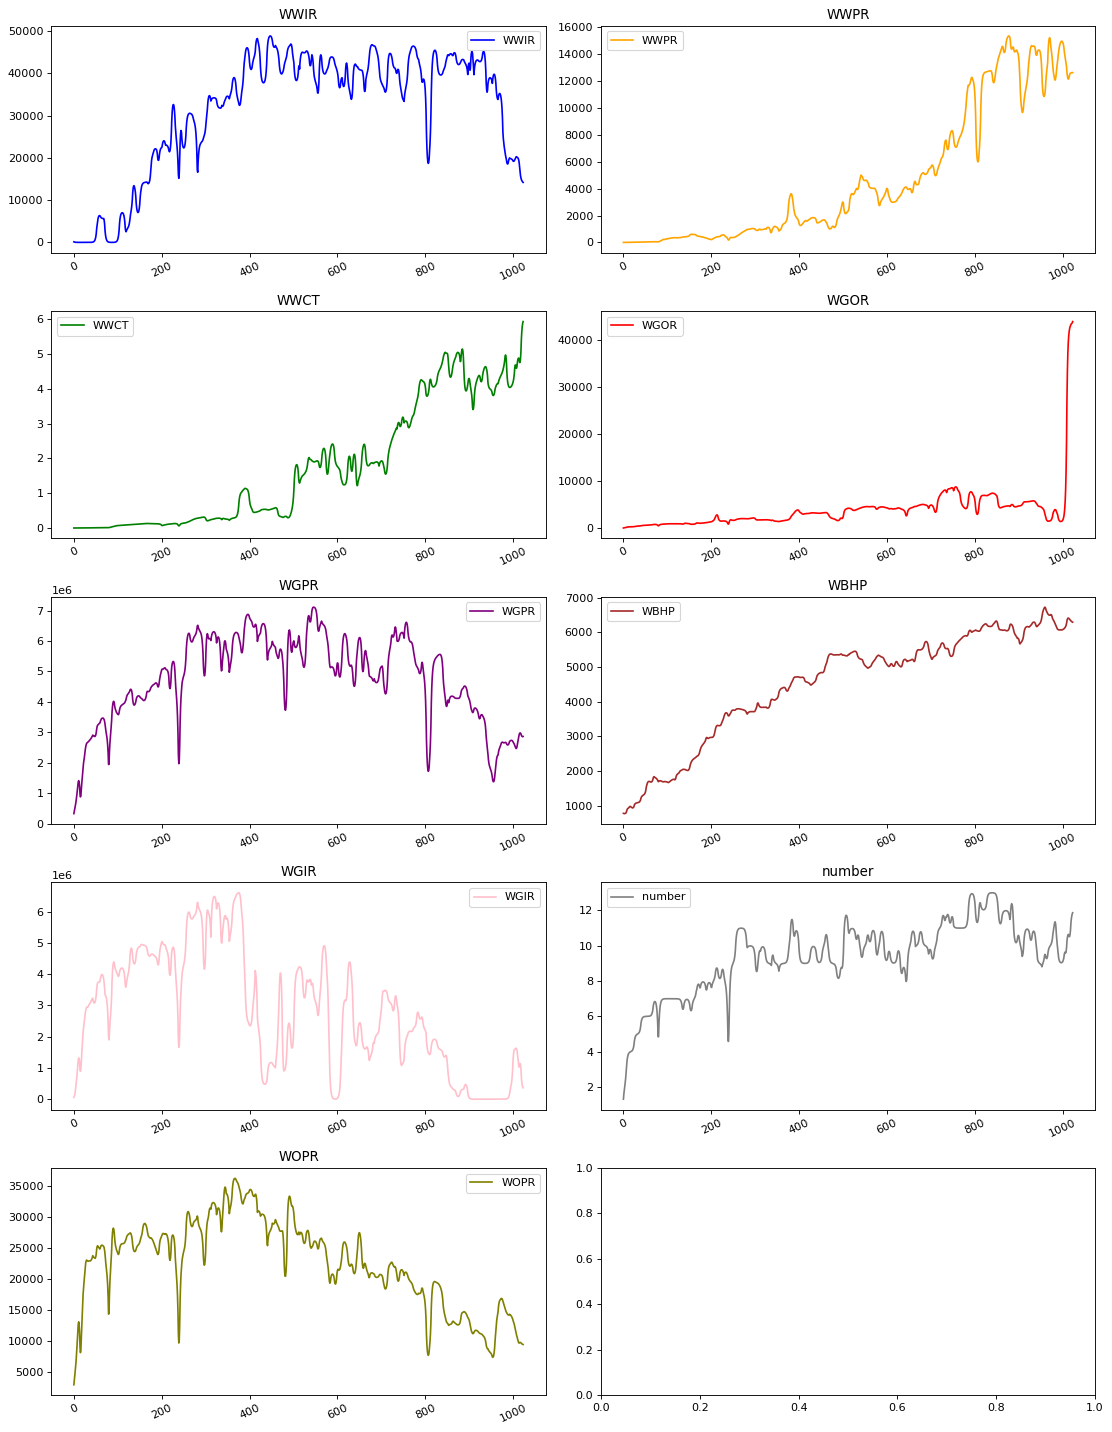

In [8]:
color_list = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]


def Visualize(data):
    features= list(data.select_dtypes(include=[np.number]).columns.values)
    feature_size=len(features)
    fig, axes = plt.subplots(
        nrows=int(np.ceil(feature_size/2)), ncols=2, figsize=(14, feature_size*2), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(feature_size):
        key = features[i]
        c = color_list[i % (len(color_list))]
        t_data = data[key]
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{}".format(key),
            rot=25,
        )
        ax.legend([key])
    plt.tight_layout()


Visualize(smoothed_df)

In [9]:
smoothed_df.index = Time
smoothed_df

,WWIR,WWPR,WWCT,WGOR,WGPR,WBHP,WGIR,number,WOPR
Time,,,,,,,,,
0.0000,131.084462,4.835622,0.000979,76.086576,3.297641e+05,778.682936,56959.764016,1.313130,2989.591340
1.0000,83.108185,4.829750,0.001007,93.548533,4.123744e+05,774.313727,89359.376675,1.613458,3770.043554
4.0000,52.298139,4.958100,0.001046,108.069064,4.826483e+05,771.883853,140211.952477,1.837088,4431.591128
8.0000,32.509437,5.252319,0.001107,122.557026,5.546412e+05,771.423757,219672.939862,2.028655,5106.132221
16.5000,19.796658,5.746343,0.001195,139.916098,6.427575e+05,773.353490,343606.367286,2.226398,5928.159454
...,...,...,...,...,...,...,...,...,...
3300.1875,14891.738279,12602.817231,5.404877,43281.815124,2.906506e+06,6330.569940,723839.240760,11.268514,9663.453897
3302.9219,14626.021862,12617.263444,5.634323,43408.444510,2.877575e+06,6317.327786,550031.032393,11.529288,9596.027476
3306.3398,14442.353774,12630.760057,5.783247,43501.354882,2.861555e+06,6306.683810,444494.049345,11.696171,9545.472706


In [10]:
smoothed_df.to_excel(r'Total_Field_denoised.xlsx', index = False)